## CA 1:

### Task 1

#### Importing the neccessary libraries and writing the data:

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator


data = {
    "treatment": ["yes", "yes","yes", "yes", "yes", # no = placebo
                  "yes", "yes","yes", "yes", "yes",
                  "yes", "yes","yes", "yes", "yes",
                  "yes", "yes","yes", "yes", "yes",
                  "yes", "yes", "yes", "yes", "yes",
                  "no", "no", "no", "no", "no",
                  "no", "no", "no", "no", "no",
                  "no", "no", "no", "no", "no",
                  "no", "no", "no", "no", "no",
                  "no", "no", "no", "no"],

    "survival time (months)": [1, 5, 6, 6, 9, 
                      10, 10, 10, 12, 12,
                      12, 12, 12, 13, 15,
                      16, 20, 24, 24, 27,
                      32, 34, 36, 36, 44,
                      3, 6, 6, 6, 6,
                      8, 8, 12, 12, 12,
                      15, 16, 18, 18, 20,
                      22, 24, 28, 28, 28,
                      30, 30, 33, 42],

    "event": [0, 0, 1, 1, 0, # 1 = event happened, 0 = censored
                 1, 1, 0, 1, 1,
                 1, 1, 0, 0, 0,
                 0, 0, 1, 0, 0,
                 1, 0, 0, 0, 0,
                 0, 1, 1, 1, 1,
                 1, 1, 1, 1, 0,
                 0, 0, 0, 0, 1,
                 0, 1, 0, 0, 0,
                 1, 0, 0, 1]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Display the DataFrame
df.head()


,treatment,survival time (months),event
0,yes,1,0
1,yes,5,0
2,yes,6,1
3,yes,6,1
4,yes,9,0


In [13]:
# Separate data into treatment groups
treatment_yes = df[df["treatment"] == "yes"]
treatment_no = df[df["treatment"] == "no"]

# The groups with only the non-censored data
treatment_yes_1 = df[(df["treatment"] == "yes") & (df["event"] == 1)]
treatment_no_1 = df[(df["treatment"] == "no") & (df["event"] == 1)]

print(f"There are {len(treatment_yes_1)} failures in the treatment group and {len(treatment_no_1)} failures in the control group") # Double checking that the number of rows is correct

# Average survival time
avg_survival_time_treatment = sum(df["survival time (months)"][:25]) / 25
avg_survival_time_control = sum(df["survival time (months)"][25:])  / 24

print(f"The average survival time for the treatment group is {avg_survival_time_treatment} and the average survival time for the control group is {avg_survival_time_control}")

# Average hazard rate
avg_hazard_treatment = len(treatment_yes_1) / sum(df["survival time (months)"][:25])
avg_hazard_control = len(treatment_no_1) / sum(df["survival time (months)"][25:])

print(f"The average hazard rate for the treatment group is {avg_hazard_treatment} and the average hazard rate for the control group is {avg_hazard_control}")

# Hazard ratio
hazard_ratio = avg_hazard_control / avg_hazard_treatment
print(f"The hazard ratio is {hazard_ratio}")

There are 10 failures in the treatment group and 12 failures in the control group
The average survival time for the treatment group is 17.52 and the average survival time for the control group is 17.958333333333332
The average hazard rate for the treatment group is 0.0228310502283105 and the average hazard rate for the control group is 0.027842227378190254
The hazard ratio is 1.2194895591647332


One can see that the average survival time higher for the control group, but the difference is not significant.
Furthermore, the hazard is higher for the control group, as seen above. The ratio is 1.2, which means that the hazard is 20% higher for the control group.
One should take this info with a grain of salt, because there are quite many censored patients in the treatment group.

### Task 2

![Alt text](image.png)

![Alt text](image-1.png)

![Alt text](image-2.png)

![Alt text](image-3.png)

est_1 is for the treatment group, while est_2 is for the control group.

![Alt text](image-4.png)

### Task 3


![Alt text](image-5.png)

As seen above on the curve, the median survival time for the treatment group is 32, while it is 30 for the control group.

### Task 4

#### Making lists of the data:

In [33]:
# Making lists since they are easier to work with for this instance in sksurv

treatment = [1, 5, 6, 6, 9, 
                      10, 10, 10, 12, 12,
                      12, 12, 12, 13, 15,
                      16, 20, 24, 24, 27,
                      32, 34, 36, 36, 44]

control = [3, 6, 6, 6, 6,
                      8, 8, 12, 12, 12,
                      15, 16, 18, 18, 20,
                      22, 24, 28, 28, 28,
                      30, 30, 33, 42]

treatment_event = [0, 0, 1, 1, 0, # 1 = event happened, 0 = censored
                 1, 1, 0, 1, 1,
                 1, 1, 0, 0, 0,
                 0, 0, 1, 0, 0,
                 1, 0, 0, 0, 0,]

control_event = [0, 1, 1, 1, 1, # 1 = event happened, 0 = censored
                 1, 1, 1, 1, 0,
                 0, 0, 0, 0, 1,
                 0, 1, 0, 0, 0,
                 1, 0, 0, 1]

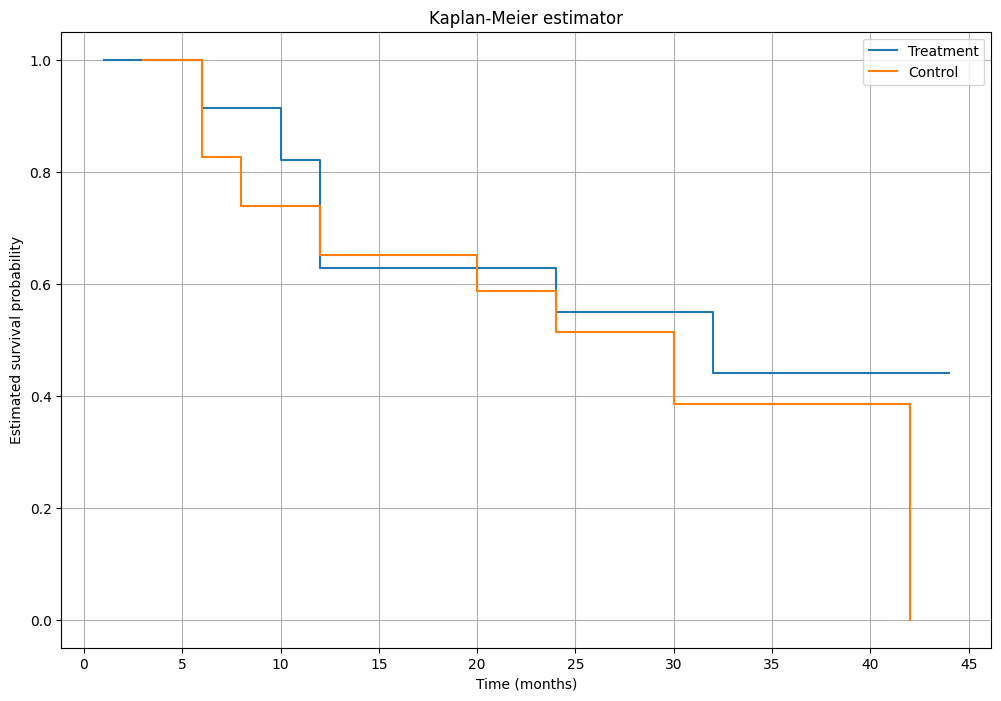

In [34]:
# Making the event data into boolean (because sksurv requires it)

treatment_event_bool = np.array(treatment_event, dtype=bool)
control_event_bool = np.array(control_event, dtype=bool)

# Kaplan-Meier estimator

time_treatment, survival_prob_treatment, conf_int = kaplan_meier_estimator(treatment_event_bool, treatment, conf_type="log-log")
time_control, survival_prob_control, conf_int = kaplan_meier_estimator(control_event_bool, control, conf_type="log-log")

# Plotting the Kaplan-Meier curves

plt.figure(figsize=(12, 8))
plt.step(time_treatment, survival_prob_treatment, where="post", label="Treatment")
plt.step(time_control, survival_prob_control, where="post", label="Control")
plt.xlabel("Time (months)")
plt.ylabel("Estimated survival probability")
plt.title("Kaplan-Meier estimator")

plt.xticks(np.arange(0, 50, 5))
plt.legend()
plt.grid(True)
plt.show()

As seen above, the graph I made by hand is approximately the same as the one made by the Kaplan-Meier estimator.